In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Импорт датасетов

In [3]:
from codecs import ignore_errors


df_train = pd.read_csv('train.csv').drop(columns=['id'])
df_test = pd.read_csv('test.csv')
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [4]:
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    219129 non-null  float64
 1   V1      219129 non-null  float64
 2   V2      219129 non-null  float64
 3   V3      219129 non-null  float64
 4   V4      219129 non-null  float64
 5   V5      219129 non-null  float64
 6   V6      219129 non-null  float64
 7   V7      219129 non-null  float64
 8   V8      219129 non-null  float64
 9   V9      219129 non-null  float64
 10  V10     219129 non-null  float64
 11  V11     219129 non-null  float64
 12  V12     219129 non-null  float64
 13  V13     219129 non-null  float64
 14  V14     219129 non-null  float64
 15  V15     219129 non-null  float64
 16  V16     219129 non-null  float64
 17  V17     219129 non-null  float64
 18  V18     219129 non-null  float64
 19  V19     219129 non-null  float64
 20  V20     219129 non-null  float64
 21  V21     21

(219129, 31)

In [5]:
class_count_0, class_count_1 = df_train['Class'].value_counts()

class_0 = df_train[df_train['Class'] == 0]
class_1 = df_train[df_train['Class'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (218660, 31)
class 1: (469, 31)


<Axes: xlabel='Class', ylabel='count'>

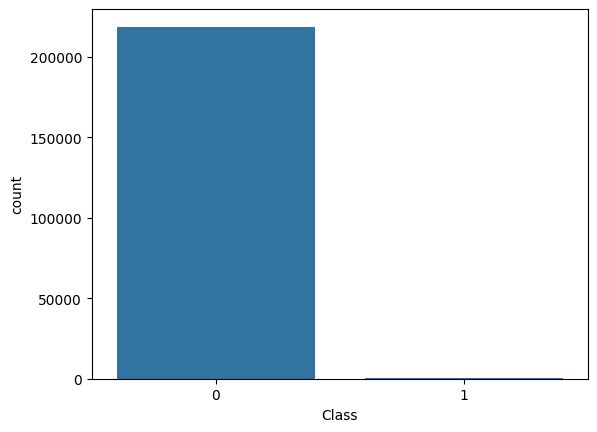

In [6]:
sns.countplot(df_train, x='Class')

# Применим технику Oversampling к классу `1`

До Oversampling: 
Class
0    218660
1       469
Name: count, dtype: int64
После Oversampling: 
Class
0    218660
1    218660
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='Class'>

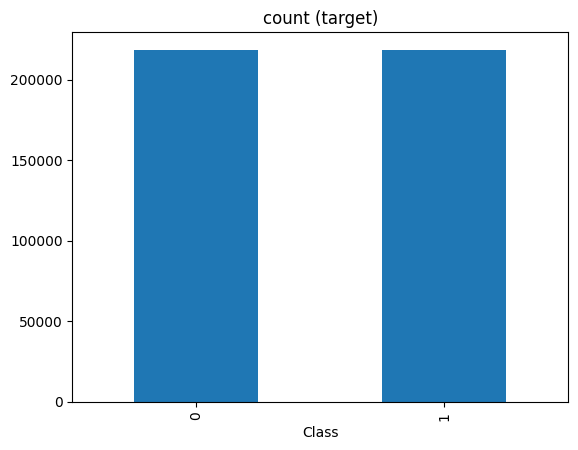

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_train.drop('Class', axis=1) 
y = df_train['Class'] 

smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X, y)

data = pd.concat([pd.DataFrame(X_oversampled), pd.DataFrame(y_oversampled, columns=['Class'])], axis=1)

print(f"До Oversampling: \n{y.value_counts()}")
print(f"После Oversampling: \n{y_oversampled.value_counts()}")
y_oversampled.value_counts().plot(kind='bar', title='count (target)')

# Применим техники сэмплирования на полученном датасете

**Случайный сэмплинг**

Для расчёта размера выборки при конечной генеральной совокупности используется следующая формула:

$$
n = \frac{N \cdot z^2 \cdot p(1 - p)}{d^2 \cdot (N - 1) + z^2 \cdot p(1 - p)}
$$

Где:

- \( n \) — требуемый размер выборки  
- \( N \) — размер всей популяции  
- \( z \) — Z-значение (например, 1.96 для 95% доверительного уровня)  
- \( p \) — предполагаемая доля единиц в популяции (0.5 — максимальная неопределённость)  
- \( d \) — допустимая погрешность (например, 0.05 для ±5%)


In [8]:
N = len(data)       # Размер всего датасета
z = 1.96                # Z-оценка для 95% доверительного уровня (по нормальному распределению)
p = 0.5                 # Оценка доли успеха (p=0.5 — "наихудший случай", при котором дисперсия максимальна)
d = 0.05                # Допустимая погрешность (5%)

# Формула
sample_size = (N * z**2 * p * (1-p)) / ((d**2 * (N-1)) + (z**2 * p * (1-p)))
sample_size = int(sample_size)

print(f"Полученный размер сэмпла: {np.round(sample_size)}")

Полученный размер сэмпла: 383


In [9]:
import random as rd

random_sample_indices = rd.sample(list(data.index.values), sample_size)

sample_1 = data.loc[random_sample_indices]
display(sample_1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
323341,40355.008608,-0.906870,0.112351,2.173897,3.188793,-0.601446,1.528231,0.376007,0.456301,-0.395654,...,0.100412,0.321712,0.345488,-0.330758,-0.231912,0.349663,0.200851,0.148816,220.296172,1
199051,94087.000000,1.998878,0.283765,-1.578928,1.530079,0.457960,-1.270948,0.601958,-0.560130,1.272735,...,-0.096759,0.161238,-0.016878,0.085696,0.497965,-0.517512,-0.018064,-0.059985,21.000000,0
93445,58883.000000,1.052999,-0.813017,0.040070,0.174859,-1.097578,-1.133389,0.013745,-0.286761,-1.041639,...,-0.255937,-0.656046,-0.091701,0.703038,0.325206,0.461189,-0.056192,0.042736,172.940000,0
155301,75299.000000,-0.963539,1.566897,0.724996,0.904445,-0.345648,-0.534331,0.584737,0.693341,-0.961345,...,0.189844,0.494414,0.095939,0.420140,-0.283933,-0.315838,0.132408,0.106044,59.950000,0
9359,9511.000000,-5.279955,4.967650,-0.842401,-1.637029,-1.015827,-1.473978,0.337848,0.190958,3.912127,...,-0.764502,-0.766597,0.098236,0.429543,0.507916,0.304820,-0.348848,-1.208024,3.780000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310122,93214.080536,0.650248,0.571298,-0.962184,-0.325084,0.238380,0.172651,-0.950458,-1.513011,1.543598,...,-1.125659,1.115000,0.257620,-0.469941,-0.553064,0.050535,0.119433,0.130848,11.534267,1
328520,113847.489382,0.058110,0.942017,-0.726900,-0.077944,0.829641,-0.745531,0.691818,-0.138250,0.025817,...,0.242994,0.704429,-0.303688,-0.851111,0.241795,-0.206943,0.069758,0.036624,19.542669,1
155089,75208.000000,-0.534179,0.594856,1.183628,0.982909,0.611657,-0.829091,0.822513,-0.326513,-0.287569,...,0.170501,0.818794,0.218445,0.398973,-0.111345,-0.314056,0.291599,0.049388,45.400000,0
95918,59542.000000,0.569264,-2.890452,-1.141775,-1.121361,-1.352623,-0.194766,-0.056657,-0.233889,-1.782988,...,0.157761,-0.499155,-0.685039,-0.789513,0.514834,-0.037405,-0.123364,0.042535,543.800000,0


**Систематический сэмплинг**

In [10]:
length = len(data)
interval = length // sample_size
print('Интервал:',interval)

rd.seed(42)
first = rd.randint(0, interval)
print('Первый элемент:',first)

Интервал: 1141
Первый элемент: 228


In [11]:
indexes = np.arange(first, length, step = interval)
sample_2 = data.iloc[indexes]
display(sample_2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
228,459.000000,1.497869,-1.092028,0.331581,-1.596895,-1.351608,-0.501680,-1.049484,-0.101078,-2.079278,...,-0.072058,0.172677,-0.064656,0.085393,0.451649,-0.100819,0.037235,0.008136,21.600000,0
1369,668.000000,-0.352338,1.072880,1.147921,-0.085959,0.240843,-0.485517,0.575909,0.123325,-0.611642,...,-0.245500,-0.655894,-0.074798,-0.049772,-0.157691,0.075456,0.241926,0.084172,3.280000,0
2510,1225.000000,1.891213,-0.292909,-0.267909,0.437660,-0.692779,-0.458979,-0.392955,-0.005579,0.914475,...,-0.239926,-0.585537,0.387956,-0.032267,-0.466728,-0.693687,0.026711,-0.038176,32.240000,0
3651,1426.000000,-0.120108,1.049237,0.190860,-0.571500,0.471259,-1.102895,1.002547,-0.182925,-0.090839,...,-0.228908,-0.504817,0.087544,-0.009549,-0.459535,0.134935,0.126964,0.098294,1.790000,0
4792,1624.000000,2.014692,0.002324,-1.738653,0.624481,0.172965,-1.605065,0.672705,-0.482318,0.176468,...,0.097166,0.369566,-0.010879,0.097094,0.329338,0.392878,-0.097335,-0.073518,42.010000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432667,111185.362970,0.742487,0.618783,0.189206,0.538936,-0.226818,-0.337358,-0.614564,-1.333716,1.209951,...,-0.101267,0.182686,0.111813,-0.151057,-0.217697,-0.483311,0.065319,0.050822,21.146913,1
433808,67166.075641,-0.224377,0.735196,0.530380,1.097232,1.714226,2.890522,-0.265742,0.305659,-0.529201,...,0.597517,-0.034654,0.086787,0.732942,0.143550,-0.047064,0.018551,0.131346,5.258688,1
434949,81070.080640,0.199695,1.527380,-1.721580,1.577300,0.997022,-1.365734,0.503698,-0.410910,0.175241,...,-0.002804,0.264370,0.075322,-0.165045,-0.577046,-0.406907,0.306670,0.066686,1.443687,1
436090,105716.028350,0.154050,0.975749,1.231264,2.529137,0.630913,-0.003247,0.339876,-0.253322,0.424268,...,0.040014,0.533870,-0.135290,0.167512,-0.289390,-0.204359,-0.101573,0.120282,1.518227,1


**Стратифицированный сэмплинг**

In [12]:
data['Class'].value_counts()

Class
0    218660
1    218660
Name: count, dtype: int64

sample size calculation: sample size = round((z^2 * p * (1-p)) /((E/S)^2)) = 1537

In [13]:
# For stratified sampling
sampled_class_0 = data[data['Class'] == 0].sample(n = 1537//2, random_state=42, replace =True)
sampled_class_1 = data[data['Class'] == 1].sample(n = 1537//2, random_state=42, replace =True)

# Combine the samples
sample_3 = pd.concat([sampled_class_0, sampled_class_1])

print(sample_3)

                Time        V1        V2        V3        V4        V5  \
122174  66784.000000 -0.580059 -0.083936  1.717865 -2.152614 -0.647099   
147129  73345.000000 -0.594929 -0.105949  1.393899 -1.270562 -0.567934   
132168  69385.000000  1.036176 -0.591566  1.343389  0.599814 -1.151424   
103889  61714.000000  1.266060 -0.639390  0.737442 -0.272825 -1.409955   
120093  66180.000000 -0.690856 -0.087161  1.273623 -2.945166  1.731023   
...              ...       ...       ...       ...       ...       ...   
386812  97704.776538 -0.366201  1.587264 -1.161099  0.532124  1.825712   
351056  80985.961722 -1.737155  0.802862 -1.434530 -0.714225  1.947091   
309927  44733.534606 -2.040478  2.359176 -1.152355  0.184680  0.252995   
385641  64940.405957 -2.090700  0.731488 -1.540655  1.197878  0.810745   
238530  58328.377465  0.522327  0.299818  0.234005  0.938052 -0.278341   

              V6        V7        V8        V9  ...       V21       V22  \
122174  0.337795 -0.190118 -0.569849

**Кластерное сэмплирование**

sample_size = round((z^2 * p * (1-p)) / (E/C)^2) = 384400

In [14]:
n_clusters = 50
cluster_size = len(data) // n_clusters

data['Cluster'] = [i % n_clusters for i in range(len(data))]

np.random.seed(42)
selected_clusters = np.random.choice(range(n_clusters), size=3, replace=False)

sample_4 = pd.DataFrame()

for cluster in selected_clusters:
    cluster_data = data[data['Cluster'] == cluster]
    sample_4 = pd.concat([sample_4, cluster_data], axis=0)

sample_4 = sample_4.drop(['Cluster'], axis=1)
data.drop(columns=['Cluster'], inplace=True)
display(sample_4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13,0.020000,1.370261,-0.567491,0.835753,-0.849275,-1.180477,-0.465136,-0.904427,0.054860,-0.779581,...,-0.018703,-0.234939,0.065755,-0.037683,0.142765,-0.496525,0.013665,0.011828,5.000000,0
63,73.000000,-0.756488,1.073528,1.052849,0.681465,0.527168,1.074595,0.463517,0.637126,-0.533845,...,0.071678,0.262651,-0.272317,-1.057818,0.085271,-0.138816,0.049273,0.110112,36.260000,0
113,397.000000,0.775746,0.002678,1.469881,2.639558,0.025341,2.601387,-0.878457,0.906347,-0.127767,...,0.132551,0.664536,0.065458,-0.927344,0.062765,0.236869,0.111323,0.022711,37.160000,0
163,439.000000,-0.652936,1.361847,1.685921,2.222709,-0.454050,-0.056223,0.079570,0.453466,-1.109567,...,0.100244,0.353750,-0.030353,0.420681,-0.233627,-0.098224,-0.049940,0.007713,6.050000,0
213,454.000000,1.048078,0.744392,-0.948673,2.648768,1.002323,0.235937,0.581408,0.066402,-0.973004,...,-0.030833,-0.079277,-0.315535,-0.853601,0.616880,0.301945,-0.092647,0.019926,90.240000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437080,75946.307717,0.197353,0.141504,0.332708,-1.226690,0.472023,0.821771,-0.242941,0.130007,0.316168,...,0.242914,0.747649,-0.311539,0.482178,0.431067,-0.356010,-0.356268,-0.072002,9.842456,1
437130,1150.135365,0.412764,-0.332586,0.350417,-0.661343,0.276704,1.005330,-0.138432,0.272121,-0.511791,...,-0.297584,-0.694754,-0.021167,-1.385567,-0.266290,0.554164,-0.004363,-0.008148,71.221407,1
437180,113815.233593,0.154408,0.875801,-0.756427,-0.074400,0.786079,-0.717712,0.635808,-0.125477,0.085693,...,0.240225,0.693843,-0.289403,-0.866906,0.233674,-0.218517,0.067006,0.031356,18.631598,1
437230,82590.870176,1.150113,-0.347644,-1.446931,-1.088594,1.393143,2.740519,-0.928182,0.769572,-0.576507,...,-0.040225,-0.246454,-0.115061,0.772292,0.668424,-0.351737,0.083102,0.057789,34.081637,1


**Bootstrap сэмплинг** 

In [15]:
def bootstrap_sample(data, n_samples):
    return data.sample(n=n_samples, replace=True)

sample_5 = bootstrap_sample(data, int(len(data)*0.05))

if 'Amount' in sample_5.columns:
    mean_amount = sample_5['Amount'].mean()
    print(f"Среднее Amount в бутстрэп сэмпле: {mean_amount}")

mean_amount_data = data['Amount'].mean()
print(f"Среднее Amount в датасете:{mean_amount_data}\n")

display(sample_5)

Среднее Amount в бутстрэп сэмпле: 71.95274375734022
Среднее Amount в датасете:72.93808528879366



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
174073,79972.000000,-0.883888,0.079926,0.541215,-1.188908,-0.094686,0.276937,-0.058817,0.160826,-1.292350,...,-0.436768,-0.769682,0.179906,-0.322255,-0.723957,0.142537,-0.131716,0.079678,29.000000,0
207624,112581.000000,-0.641659,1.890639,-2.484035,-0.104938,0.132567,-2.166876,0.553351,0.678776,-0.386427,...,0.101173,0.302408,0.366065,0.171626,-0.302437,-0.594766,0.253767,0.098587,53.030000,0
417113,93925.386128,-2.313250,3.517048,-4.127006,3.464983,-0.716908,-0.841413,-5.066928,-8.952685,-2.444228,...,-3.981561,1.868146,-0.299129,-0.031538,-0.669977,-0.201981,0.336375,0.261073,1.382849,1
68148,51917.000000,-2.332937,1.683800,1.190848,3.100171,-0.657820,0.557957,-0.264859,1.102260,-1.133837,...,-0.057813,-0.244515,0.003699,-0.096118,0.097165,0.203049,0.508959,0.255541,2.270000,0
252801,82553.882866,0.282273,1.478666,-1.500624,1.260217,0.596085,-1.349688,0.510090,0.058402,-0.168542,...,-0.072819,0.048353,0.118687,0.056230,-0.421715,-0.439846,0.307029,0.076818,6.120955,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405633,51269.482135,-4.464895,4.544962,-5.242576,1.260631,-1.646412,-2.121349,-1.080312,2.031128,1.200732,...,-0.426474,-0.294226,0.487350,0.159830,0.071320,-0.355074,0.989506,0.591646,1.605961,1
162372,76926.000000,-1.099694,1.959642,1.527058,2.734228,-0.331535,-0.398929,0.289826,0.264926,-0.886978,...,-0.084250,-0.357928,0.151665,0.693615,-0.474746,-0.067353,-0.271455,0.195513,0.000000,0
291040,69344.012171,0.803610,-0.766816,1.427149,0.468746,-1.491853,0.553978,-1.498811,0.615416,1.534175,...,-0.040093,0.302823,-0.021504,0.091435,0.103655,1.061029,-0.038902,0.042437,1.836592,1
247541,84561.834431,-3.047060,2.203738,-3.287748,3.888865,-1.036955,-1.572410,-2.178430,-0.215422,-1.616388,...,0.127472,0.011094,0.356792,-0.136246,-1.369082,-0.311832,0.357263,-0.042655,13.322479,1


# Training models

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "SVC": SVC(probability=True)
}

In [34]:
samples = {
    'Simple Random Sampling' : sample_1 ,
    'Systematic Sampling' : sample_2 ,
    'Stratified Sampling' : sample_3 ,
    'Cluster Sampling' : sample_4 ,
    'Bootstrap Sampling' : sample_5
}

In [35]:
def train_evaluate(models, samples):
    
    results = {sample_name: {} for sample_name in samples}

    scaler = StandardScaler()

    for sample_name, sample_data in samples.items():
        X = sample_data.drop('Class', axis=1)
        y = sample_data['Class']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        for model_name, model in models.items():
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)

            auc = roc_auc_score(y_test, y_pred)

            results[sample_name][model_name] = auc

    return results

## Обучение моделей на сэмплах

In [36]:
execution = train_evaluate(models, samples)

results_df = pd.DataFrame(execution)
results_df

,Simple Random Sampling,Systematic Sampling,Stratified Sampling,Cluster Sampling,Bootstrap Sampling
Logistic Regression,0.693182,0.831560,0.783028,0.778959,0.772314
K-Neighbors Classifier,0.628788,0.772340,0.785284,0.934095,0.935501
Random Forest Classifier,0.708333,0.831560,0.850980,0.971964,0.968674
Gradient Boosting Classifier,0.708333,0.869504,0.812102,0.868009,0.870833
SVC,0.704545,0.819504,0.802467,0.921133,0.917699


**Выбираем `sample_4` для дальнейшие работы**

In [18]:
X = sample_4.drop('Class', axis=1)
y = sample_4['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
best_model = RandomForestClassifier()
best_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [21]:
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # ROC AUC 

In [23]:
# accuracy = accuracy_score(y_test, y_pred)
print(roc_auc_score(y_test, y_pred_proba))

print(classification_report(y_test, y_pred))

0.9961375835889856
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2617
           1       0.96      0.98      0.97      2631

    accuracy                           0.97      5248
   macro avg       0.97      0.97      0.97      5248
weighted avg       0.97      0.97      0.97      5248



In [33]:
X = df_train.drop('Class', axis=1)
y = df_train['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_new_test_scaled = scaler.transform(X_test)

In [36]:
y_pred = best_model.predict(X_new_test_scaled)
y_pred_proba = best_model.predict_proba(X_new_test_scaled)[:, 1]  # ROC AUC 

In [37]:
y_new_pred = best_model.predict(X_new_test_scaled)
y_new_pred_proba = best_model.predict_proba(X_new_test_scaled)[:, 1] 

In [39]:
# print(roc_auc_score(y_test, y_new_pred))
print(classification_report(y_test, y_new_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     43722
           1       0.07      0.96      0.13       104

    accuracy                           0.97     43826
   macro avg       0.53      0.97      0.56     43826
weighted avg       1.00      0.97      0.98     43826



In [40]:
import joblib

joblib.dump(best_model, 'fraud_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']